<a href="https://colab.research.google.com/github/sachsac/Predictions_of_Sales/blob/main/Project_1_Final_w_trees_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning Steps

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
filename = '/content/drive/MyDrive/Coding Dojo/data set/sales_predictions.csv'
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#every grocery store is "small", Supermarkets can be anything. probably OK to delete this column as well
sales_predictions.drop(columns = ['Outlet_Size', 'Item_Weight'], inplace = True)
sales_predictions
sales_predictions.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Let's simplify, supermarket vs grocery
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type2', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket'
sales_predictions.value_counts('Outlet_Type')

Outlet_Type
Supermarket      7440
Grocery Store    1083
dtype: int64

In [ ]:
#combining unique values into Lowfat vs Regular
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [ ]:
grocery_store = sales_predictions[sales_predictions['Outlet_Type'] == 'Grocery Store']
supermarkets = sales_predictions[sales_predictions['Outlet_Type'] != 'Grocery Store']

# ML Linear Regression

In [ ]:
sales_predictions.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
sales_df = pd.get_dummies(sales_predictions, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=False)
sales_df.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,FDX07,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
y = sales_df['Item_Outlet_Sales']
X = sales_df.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
X.dtypes
#we drop the identifiers because they only help to identify, it is not a factor of items

Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Location_Type_Tier 1          uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Loca

In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
#fit the model.
from sklearn.linear_model import LinearRegression
sales_model = LinearRegression()
sales_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import r2_score
#R2 scores
print('Training R^2:', r2_score(y_train, sales_model.predict(X_train)))
print('Testing R^2:', r2_score(y_test, sales_model.predict(X_test)))
# % of variance is due to features' data

Training R^2: 0.5264424685603024
Testing R^2: 0.5183542888366527


The test set results are comparable to the Training though is slightly above 50%

In [ ]:
from sklearn.metrics import mean_squared_error
#RMSE
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test))))
#ends up being same unit as target vector
#gives +/ - value of what you are predicting
#The Test RMSE is comparable (close) to the Training set RMSE.

Training RMSE: 1183.838053891126
Testing RMSE: 1152.7573803143312


In [ ]:
importance = sales_model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 #5f is decimal allowance
 #code from https://machinelearningmastery.com/calculate-feature-importance-with-python/ for formatting

Feature: 0, Score: -503.72958
Feature: 1, Score: 15.65804
Feature: 2, Score: -42.31077
Feature: 3, Score: -27.36625
Feature: 4, Score: 27.36625
Feature: 5, Score: -23.55031
Feature: 6, Score: -46.41212
Feature: 7, Score: 18.30107
Feature: 8, Score: 20.44505
Feature: 9, Score: -142.08472
Feature: 10, Score: -8.81382
Feature: 11, Score: 21.49522
Feature: 12, Score: 3.40535
Feature: 13, Score: 14.20567
Feature: 14, Score: -18.99904
Feature: 15, Score: -7.70373
Feature: 16, Score: -73.44255
Feature: 17, Score: 316.02691
Feature: 18, Score: -38.11804
Feature: 19, Score: -58.33754
Feature: 20, Score: 23.58261
Feature: 21, Score: -194.26503
Feature: 22, Score: 121.95798
Feature: 23, Score: 72.30705
Feature: 24, Score: -1153.47433
Feature: 25, Score: 1153.47433


In [ ]:
#what are these? use X.head() 
X.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket
0,0.016047,249.8092,1999,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.019278,48.2692,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.016760,141.6180,1999,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,0.000000,182.0950,1998,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0.000000,53.8614,1987,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


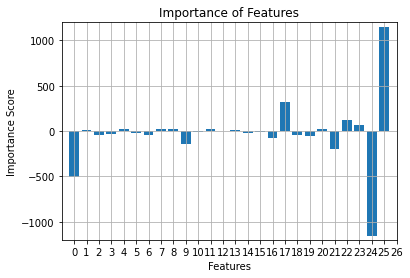

In [ ]:
import matplotlib.pyplot as plt
plt.grid()
plt.bar([x for x in range(len(importance))], importance)
plt.xlim(-1, 26)
x=np.random.randint(low=0, high=26, size=26)
plt.xticks(np.arange(0, len(x)+1, 1))
plt.ylim(-1200, 1200);
plt.title('Importance of Features')
plt.ylabel('Importance Score')
plt.xlabel('Features');
#a plot can help make sense of it

Features 25, 17, 22, and 23 are the most affective:
Outlet_Type_Supermarket, Outlet_Location_Type_Tier 3, Outlet_Location_Type_Tier 2 (so Tier types in general), and Item_Type_Seafood. Outlet type (grocery vs supermarket) being by far the most associated.
Features 24 and 0 NEGATIVELY greatly impact our sales. Which are Grocery store (24) and item visibility.

# Simple Decision Tree

In [ ]:
#we can use previous X & y and train/test split. only new things we need to do is make instance and load sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
simple_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
simple_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
#1 evaluate with default parameters
print('Default Simple Tree Training R^2 score:', r2_score(y_train, simple_tree.predict(X_train)))
print('Default Simple Tree Testing R^2 score:', r2_score(y_test, simple_tree.predict(X_test)))
#Not a good score at all!

Default Simple Tree Training R^2 score: 1.0
Default Simple Tree Testing R^2 score: 0.21100492224876632


In [ ]:
#what is our current depth?
simple_tree.get_depth()

41

In [ ]:
#list to search for max depth
max_depth_range = list(range(1,41)) #testing all between 1 and the max depth (41)

#storing the scores, basically setting up every step to be iterated for each different depth
r2 = []
for depth in max_depth_range:
  simple_tree = DecisionTreeRegressor(max_depth=depth,
                                   random_state = 42)
  simple_tree.fit(X_train, y_train)
  score = simple_tree.score(X_test, y_test) #the score for the test is the one we want to improve
  r2.append(score)

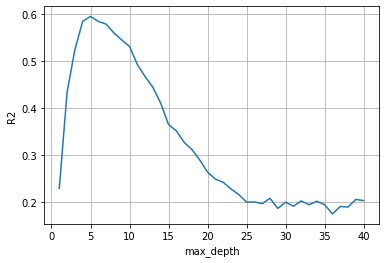

In [ ]:
#visualize to see
# Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.grid()
plt.ylabel('R2');
#optimized depth is 5

In [ ]:
#optimized simple tree
simple_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
simple_tree_5.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
print('Optimized Simple Tree Training R^2 score:', r2_score(y_train, simple_tree_5.predict(X_train)))
print('Optimized Simple Tree Testing R^2 score:', r2_score(y_test, simple_tree_5.predict(X_test)))
#still not great, but they are at least performing more similarly!

Optimized Simple Tree Training R^2 score: 0.6039254897160836
Optimized Simple Tree Testing R^2 score: 0.5947470502499344


#Bagged Tree

In [ ]:
#again, do not need to repeat setting up X and y.
#need to import bag regression
from sklearn.ensemble import BaggingRegressor

In [ ]:
bagged_tree = BaggingRegressor(random_state=42)
bagged_tree

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagged_tree.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagged_tree.predict(X_test)

array([ 577.11544,  868.80242,  923.26486, ..., 4210.65236, 2164.24948,
       2384.29638])

In [ ]:
bagged_train_score = bagged_tree.score(X_train, y_train)
bagged_test_score = bagged_tree.score(X_test, y_test)

In [ ]:
print('Default Bagged Trees Training R^2 Score:', bagged_train_score)
print('Default Bagged Trees Testing R^2 Score:', bagged_test_score)
#testing score does not perform very well

Default Bagged Trees Training R^2 Score: 0.9190346131508617
Default Bagged Trees Testing R^2 Score: 0.5262588782378272


In [ ]:
bt_40 = BaggingRegressor(n_estimators= 40, random_state = 42)
bt_40.fit(X_train, y_train)
bt_40_train_score = bt_40.score(X_train, y_train)
bt_40_test_score = bt_40.score(X_test, y_test)
print('Bagged Trees n_estimators at 40 Score:', bt_40_train_score)
print('Bagged Trees n_estimators at 40 Testing Score:', bt_40_test_score)

Bagged Trees n_estimators at 40 Score: 0.9335118655384499
Bagged Trees n_estimators at 40 Testing Score: 0.5445445533778177


In [ ]:
bt_400 = BaggingRegressor(n_estimators= 400, random_state = 42)
bt_400.fit(X_train, y_train)
bt_400_train_score = bt_400.score(X_train, y_train)
bt_400_test_score = bt_400.score(X_test, y_test)
print('Bagged Trees n_estimators at 400 Training Score:', bt_400_train_score)
print('Bagged Trees n_estimators at 400 Testing Score:', bt_400_test_score)

Bagged Trees n_estimators at 400 Training Score: 0.9393579272736498
Bagged Trees n_estimators at 400 Testing Score: 0.55099315926325


#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#fit  
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#predict
rf.predict(X_test)

array([ 707.692136,  829.114082,  838.64168 , ..., 4175.06535 ,
       2013.718758, 2361.452782])

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Random Forests R^2 Training score:', rf_train_score)
print('Random Forests R^2 Testing score:', rf_test_score)

Random Forests R^2 Training score: 0.9375267477385607
Random Forests R^2 Testing score: 0.5530634318607264


In [ ]:
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print('Random Forests Optimized Training Score:', rf_5_train_score)
print('Random Forests Optimized Testing Score:', rf_5_test_score)
#better AND closer

Random Forests Optimized Training Score: 0.6104682601982897
Random Forests Optimized Testing Score: 0.6026003233209926


# R2 Scores

In [ ]:
print('Linear Regression Training R^2 score:', r2_score(y_train, sales_model.predict(X_train)))
print('Linear Regression Testing R^2 score:', r2_score(y_test, sales_model.predict(X_test)))

Linear Regression Training R^2 score: 0.5264424685603024
Linear Regression Testing R^2 score: 0.5183542888366527


In [ ]:
print('Optimized Simple Tree Training R^2 score:', r2_score(y_train, simple_tree_5.predict(X_train)))
print('Optimized Simple Tree Testing R^2 score:', r2_score(y_test, simple_tree_5.predict(X_test)))

Optimized Simple Tree Training R^2 score: 0.6039254897160836
Optimized Simple Tree Testing R^2 score: 0.5947470502499344


In [ ]:
print('Bagged Trees n_estimators at 400 Training Score:', bt_400_train_score)
print('Bagged Trees n_estimators at 400 Testing Score:', bt_400_test_score)

Bagged Trees n_estimators at 400 Training Score: 0.9393579272736498
Bagged Trees n_estimators at 400 Testing Score: 0.55099315926325


In [ ]:
rf_train_score = rf_5.score(X_train, y_train)
rf_test_score = rf_5.score(X_test, y_test)
print('Random Forests R^2 Training score:', rf_train_score)
print('Random Forests R^2 Testing score:', rf_test_score)

Random Forests R^2 Training score: 0.6104682601982897
Random Forests R^2 Testing score: 0.6026003233209926


#RMSE Scores

In [ ]:
print('Linear Regression Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train))))
print('Linear Regression Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test))))

Linear Regression Training RMSE: 1183.838053891126
Linear Regression Testing RMSE: 1152.7573803143312


In [ ]:
print('Optimized Simple Tree Training RMSE:', np.sqrt(mean_squared_error(y_train, simple_tree_5.predict(X_train))))
print('Optimized Simple Tree Testing RMSE:', np.sqrt(mean_squared_error(y_test, simple_tree_5.predict(X_test))))

Optimized Simple Tree Training RMSE: 1082.6656773340972
Optimized Simple Tree Testing RMSE: 1057.3947626960721


In [ ]:
mse_bt_train = MSE(y_train, bt_400.predict(X_train))
mse_bt_test = MSE(y_test, bt_400.predict(X_test))
print('Bagged Tree Training RMSE:', np.sqrt(mse_bt_train))
print('Bagged Tree Testing RMSE:', np.sqrt(mse_bt_test))

Bagged Tree Training RMSE: 423.6360797480683
Bagged Tree Testing RMSE: 1113.0137805357635


In [ ]:
print('Random Forests Training RMSE:', np.sqrt(MSE(y_train, rf_5.predict(X_train))))
print('Random Forests Testing RMSE:', np.sqrt(MSE(y_test, rf_5.predict(X_test))))

Random Forests Training RMSE: 1073.6861410348588
Random Forests Testing RMSE: 1047.0991749300013


#Recommended model
The model I would most recommend is the Random Forests due to the highest performing R^2 scores between its training and testing, as well as a similar RMSE score that is lower or equal to the other models for testing.